# WITH SEABORN

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [4]:
kill_new = kill.copy()

In [5]:
kill_new.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
kill_new.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [7]:
kill_new.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
kill_new.manner_of_death.value_counts().describe

<bound method NDFrame.describe of shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64>

In [9]:
kill_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [10]:
kill_new.manner_of_death.value_counts().index

Index(['shot', 'shot and Tasered'], dtype='object')

In [11]:
kill_new.manner_of_death.value_counts().values

array([2363,  172], dtype=int64)

In [12]:
kill_new.manner_of_death[kill_new.manner_of_death.isin(["shot", "shot and Tasered"])].value_counts().values

array([2363,  172], dtype=int64)

In [13]:
kill_new.manner_of_death[kill_new.manner_of_death.isin(["shot", "shot and Tasered"])].value_counts().index

Index(['shot', 'shot and Tasered'], dtype='object')

In [14]:
kill_new.manner_of_death.values

array(['shot', 'shot', 'shot and Tasered', ..., 'shot', 'shot', 'shot'],
      dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [15]:
kill_new.groupby("manner_of_death")[["age"]].agg("min", "max")

,age
manner_of_death,
shot,6.0
shot and Tasered,15.0


In [16]:
kill_new.groupby("manner_of_death")[["age"]].describe()

age                                                    
                   count       mean        std   min   25%   50%   75%   max
manner_of_death                                                             
shot              2290.0  36.574672  13.090166   6.0  26.0  34.0  45.0  91.0
shot and Tasered   168.0  37.023810  12.221485  15.0  28.0  35.0  46.0  76.0

In [17]:
kill_new.groupby("gender")[["age"]].describe()

age                                                    
         count       mean        std   min   25%   50%   75%   max
gender                                                            
F        104.0  36.567308  12.922295  12.0  26.0  36.0  46.0  71.0
M       2354.0  36.607052  13.038267   6.0  26.0  34.0  45.0  91.0

In [18]:
kill_new.groupby(["manner_of_death", "age"])[["age"]].describe()

age                                         
                      count  mean  std   min   25%   50%   75%   max
manner_of_death  age                                                
shot             6.0    1.0   6.0  NaN   6.0   6.0   6.0   6.0   6.0
                 12.0   1.0  12.0  NaN  12.0  12.0  12.0  12.0  12.0
                 13.0   1.0  13.0  NaN  13.0  13.0  13.0  13.0  13.0
                 14.0   1.0  14.0  NaN  14.0  14.0  14.0  14.0  14.0
                 15.0   7.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0
...                     ...   ...  ...   ...   ...   ...   ...   ...
shot and Tasered 60.0   1.0  60.0  NaN  60.0  60.0  60.0  60.0  60.0
                 63.0   4.0  63.0  0.0  63.0  63.0  63.0  63.0  63.0
                 67.0   1.0  67.0  NaN  67.0  67.0  67.0  67.0  67.0
                 70.0   1.0  70.0  NaN  70.0  70.0  70.0  70.0  70.0
                 76.0   1.0  76.0  NaN  76.0  76.0  76.0  76.0  76.0

[122 rows x 8 columns]

In [19]:
sns.set(style='whitegrid')

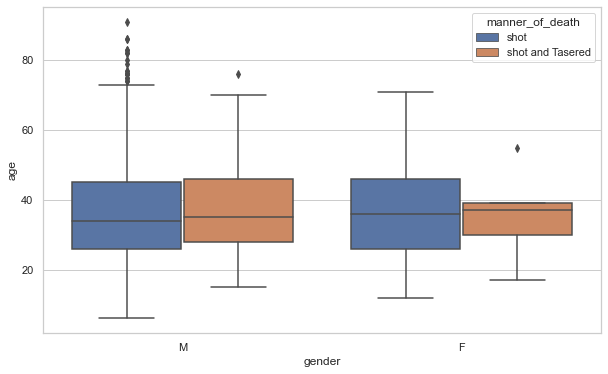

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x = kill_new.gender, y=kill_new.age, hue=kill_new.manner_of_death); # with seaborn

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

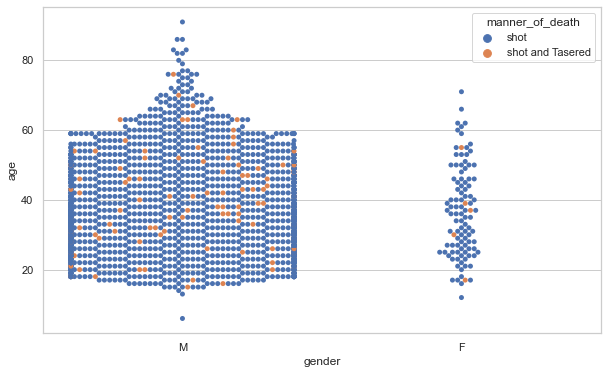

In [21]:
plt.figure(figsize=(10,6))
sns.swarmplot(x = kill_new.gender, y=kill_new.age, hue=kill_new.manner_of_death); # with seaborn

## 2: Plot 12 most dangerous cities

In [22]:
kill_new.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [23]:
kill_new.city.describe(include=all)

count            2535
unique           1417
top       Los Angeles
freq               39
Name: city, dtype: object

In [24]:
kill_new.groupby("threat_level")[["city"]].describe()

city                         
             count unique          top freq
threat_level                               
attack        1611   1020      Phoenix   20
other          766    538  Los Angeles   16
undetermined   158    136    Santa Ana    6

In [25]:
kill_new.city.values

array(['Shelton', 'Aloha', 'Wichita', ..., 'Melba', 'Oshkosh', 'Brooklyn'],
      dtype=object)

In [26]:
kill_new.city.index

RangeIndex(start=0, stop=2535, step=1)

In [27]:
kill_new.city.value_counts().index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       ...
       'Opa-Locka', 'Berrien County', 'Manatee', 'Paulding County', 'Colbert',
       'Columbia Heights', 'Ozark', 'Lampe', 'Seagoville', 'Oshkosh'],
      dtype='object', length=1417)

In [28]:
kill_new.city.value_counts().values

array([39, 31, 27, ...,  1,  1,  1], dtype=int64)

In [29]:
city_freq = kill_new.city.value_counts().head(12)
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

In [30]:
kill_new.city.value_counts().iloc[:12].values

array([39, 31, 27, 25, 21, 20, 19, 18, 18, 15, 14, 14], dtype=int64)

In [31]:
kill_new.city.value_counts().iloc[:12].index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       'Oklahoma City', 'Tucson'],
      dtype='object')

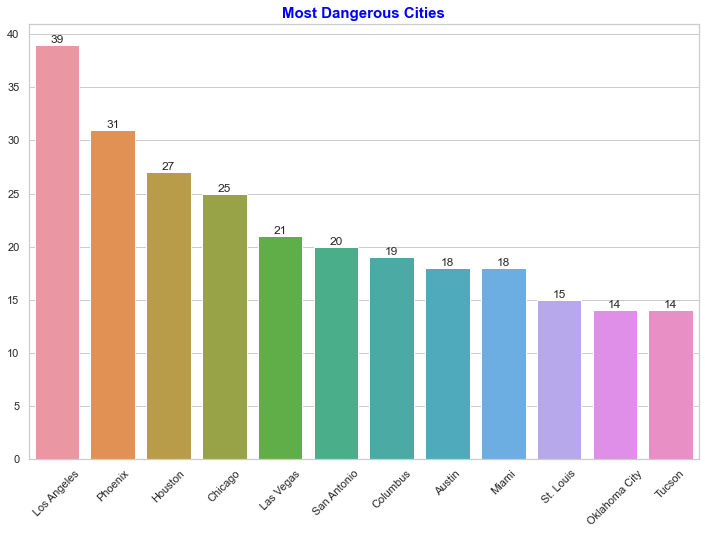

In [32]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(12,8))
ax = sns.barplot(x=city_freq.index, y=city_freq.values)
ax.set_title("Most Dangerous Cities", fontdict = {"fontsize": 15, "fontweight" : "bold", "color" : "blue"})
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

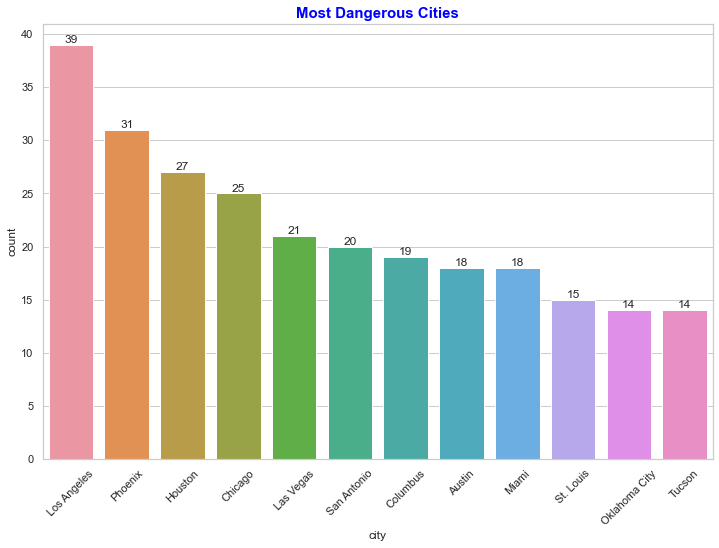

In [33]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(12,8))
ax = sns.countplot(x=kill_new.city, order=kill_new.city.value_counts().iloc[:12].index)
ax.set_title("Most Dangerous Cities", fontdict = {"fontsize": 15, "fontweight" : "bold", "color" : "blue"})
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

## 3: Plot 20 most dangerous states

In [34]:
state_freq = kill_new.state.value_counts().head(20)
state_freq

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

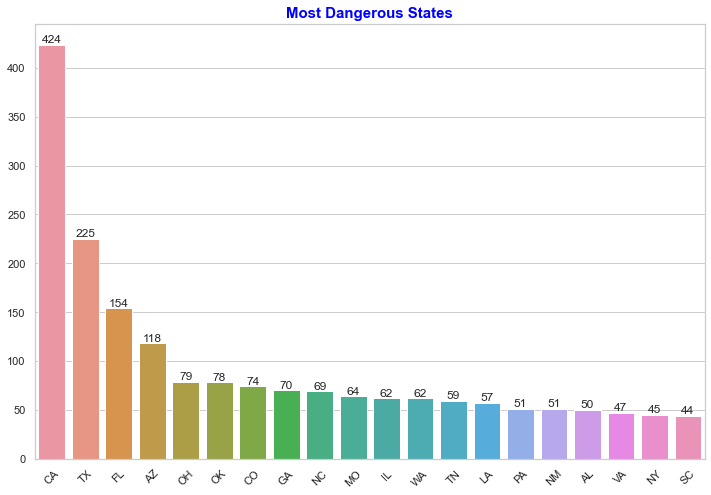

In [35]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(12,8))
ax = sns.barplot(x=state_freq.index, y=state_freq.values)
ax.set_title("Most Dangerous States", fontdict = {"fontsize": 15, "fontweight" : "bold", "color" : "blue"})
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

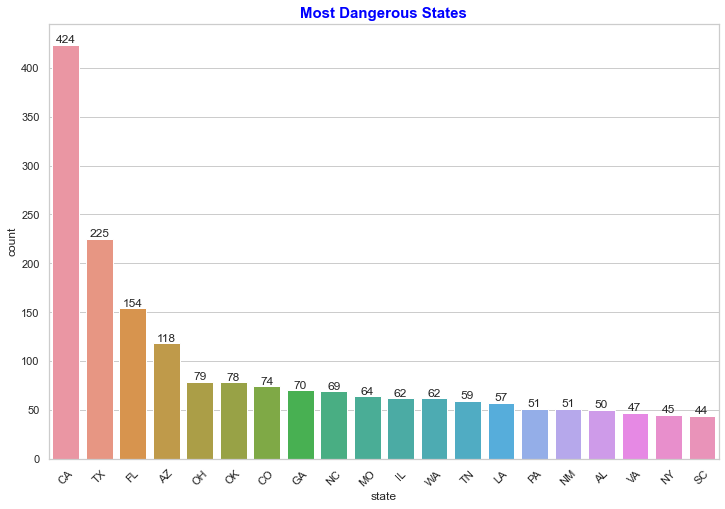

In [36]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(12,8))
ax = sns.countplot(x=kill_new.state, order=kill_new.state.value_counts().iloc[:20].index)
ax.set_title("Most Dangerous States", fontdict = {"fontsize": 15, "fontweight" : "bold", "color" : "blue"})
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

## 4: Plot Having mental ilness or not for killed people

In [37]:
kill_new.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [38]:
kill_new.signs_of_mental_illness.value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [39]:
illness = kill_new.signs_of_mental_illness.value_counts()
illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

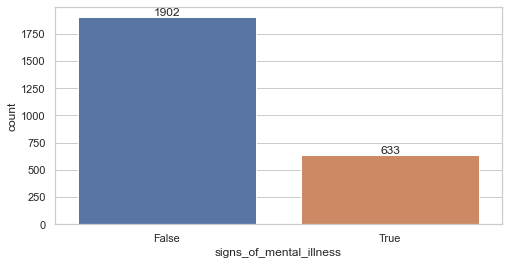

In [40]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,4))
ax = sns.countplot(x=kill_new.signs_of_mental_illness)
# ax.set_title("", fontdict = {"fontsize": 15, "fontweight" : "bold", "color" : "blue"})
# plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

## 5: Plot number of Threat Types

In [41]:
kill_new.threat_level.value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

In [42]:
threads_freq = kill_new.threat_level.value_counts()
threads_freq

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

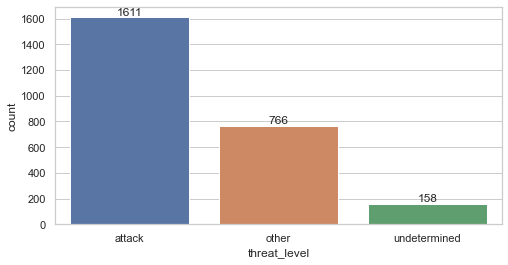

In [43]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,4))
ax = sns.countplot(x=kill_new.threat_level)
# ax.set_title("", fontdict = {"fontsize": 15, "fontweight" : "bold", "color" : "blue"})
# plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

## 6: Plot number of Flee Types

In [44]:
kill_new.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [45]:
kill_new.flee.value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

In [46]:
flee_freq = kill_new.flee.value_counts()
flee_freq

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

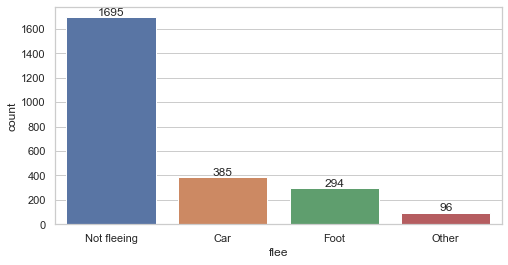

In [47]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,4))
ax = sns.countplot(x=kill_new.flee)
# ax.set_title("", fontdict = {"fontsize": 15, "fontweight" : "bold", "color" : "blue"})
# plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()